# Introduction to Pandas

- Learn about Pandas DataFrames
- Learn about Pandas Series

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

A Pandas dataframe is almost like an Excel table that we can manipulate in Python. The most inconvienient thing about them is creating them in the first place, if we enter the data manually. We will look at two different examples:

- Loading data manually
- Loading data from an external source (comma separated file)


## Loading data manually

We have seen our example of loading state information:

In [2]:
state_info = [
     ['CA', 39_560_000, 163_694, 'Sacramento', 'California'],
     ['WA', 7_536_000 ,71_297, 'Olympia', 'Washington'],
     ['TX', 28_995_881 , 268_596, 'Austin', 'Texas'],
     ['OR', 4_190_713, 98_378, 'Salem', 'Oregon'],
     ['WY', 578_759 ,97_914, 'Cheyenne', 'Wyoming'],
     ['IL', 12_671_821, 57_914, 'Springfield', 'Illinois'],
     ['HI', 1_420_491 , 10_931, 'Honolulu', 'Hawaii'],
     ['AK', 710_249, 663_268, 'Juneau', 'Alaska'],
     ['NY', 19_453_561, 54_555, 'Albany', 'New York']
]

Let's load this into a dataframe. Our dataframe will interpret each element in `state_info` as its own entry. We will also give the columns their own names:

In [3]:
state_frame = pd.DataFrame(state_info, columns=['abb', 'pop', 'area', 'captial', 'state'])
state_frame

,abb,pop,area,captial,state
0,CA,39560000,163694,Sacramento,California
1,WA,7536000,71297,Olympia,Washington
2,TX,28995881,268596,Austin,Texas
3,OR,4190713,98378,Salem,Oregon
4,WY,578759,97914,Cheyenne,Wyoming
5,IL,12671821,57914,Springfield,Illinois
6,HI,1420491,10931,Honolulu,Hawaii
7,AK,710249,663268,Juneau,Alaska
8,NY,19453561,54555,Albany,New York


Another very common way to see dataframes being created is to enter a column at a time, rather than a field at a time. We do this by passing in a dictionary. Unfortunately, both syntaxes are pretty common, so we will have to be at least a little familiar with both of them

In [4]:
state_info_dict = {
    'abb': ['CA', 'WA', 'TX', 'OR', 'WY', 'IL', 'HI', 'AK', 'NY'],
    'pop': (39560000, 7536000, 28995881, 4190713, 578759, 12671821, 1420491, 710249, 19453561),
   'area': (163694, 71297, 268596, 98378, 97914, 57914, 10931, 663268, 54555),
   'capital': ('Sacramento', 'Olympia','Austin', 'Salem', 'Cheyenne', 'Springfield',
              'Honolulu', 'Juneau', 'Albany'),
 'state': ('California', 'Washington', 'Texas', 'Oregon', 'Wyoming', 'Illinois', 
           'Hawaii', 'Alaska', 'New York')
}

In [5]:
# a dictionary transforms each KEY into a column name, and the values as the entries
# note this is the same dataframe as before.
pd.DataFrame(state_info_dict)

,abb,pop,area,capital,state
0,CA,39560000,163694,Sacramento,California
1,WA,7536000,71297,Olympia,Washington
2,TX,28995881,268596,Austin,Texas
3,OR,4190713,98378,Salem,Oregon
4,WY,578759,97914,Cheyenne,Wyoming
5,IL,12671821,57914,Springfield,Illinois
6,HI,1420491,10931,Honolulu,Hawaii
7,AK,710249,663268,Juneau,Alaska
8,NY,19453561,54555,Albany,New York


There are a _lot_ of different methods defined on dataframes. Let's take a look at a few examples:

In [8]:
pd.__version__

'0.25.3'

In [6]:
state_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
abb        9 non-null object
pop        9 non-null int64
area       9 non-null int64
captial    9 non-null object
state      9 non-null object
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


This lets us know what the names of the columns are at a glance, what types are stored, and how many of them are in each column.

In [9]:
# We can summarize the data
state_frame.describe()

,pop,area
count,9.000000e+00,9.000000
mean,1.279083e+07,165171.888889
std,1.391732e+07,201285.435214
min,5.787590e+05,10931.000000
25%,1.420491e+06,57914.000000
50%,7.536000e+06,97914.000000
75%,1.945356e+07,163694.000000
max,3.956000e+07,663268.000000


In [10]:
# We can summarize the data, converting it to an int
# which also forces the formatting to be nicer
state_frame.describe().astype(int)

,pop,area
count,9,9
mean,12790830,165171
std,13917315,201285
min,578759,10931
25%,1420491,57914
50%,7536000,97914
75%,19453561,163694
max,39560000,663268


We can find the "average" properties of numeric columns, such as the minimum, maximum, average (mean and median) of a particular column. 

Note that these concepts only really make sense for numeric columns (we could _debate_ median for strings) so it automatically filters down to the numeric columsn `pop` and `area`.

In [11]:
# state_frame itself hasn't changed:
state_frame

,abb,pop,area,captial,state
0,CA,39560000,163694,Sacramento,California
1,WA,7536000,71297,Olympia,Washington
2,TX,28995881,268596,Austin,Texas
3,OR,4190713,98378,Salem,Oregon
4,WY,578759,97914,Cheyenne,Wyoming
5,IL,12671821,57914,Springfield,Illinois
6,HI,1420491,10931,Honolulu,Hawaii
7,AK,710249,663268,Juneau,Alaska
8,NY,19453561,54555,Albany,New York


We can also select a particular column by name:

In [12]:
state_frame['pop']

0    39560000
1     7536000
2    28995881
3     4190713
4      578759
5    12671821
6     1420491
7      710249
8    19453561
Name: pop, dtype: int64

Note the numbers down the side (called the _index_) match the numbers in the original dataframe.

We can sort by population using the name of the column:

In [36]:
sorted_state_frame = state_frame.sort_values(['pop', 'area'], ascending=[True, False])
sorted_state_frame.set_index('state')

,abb,pop,area,captial
state,,,,
Wyoming,WY,578759,97914,Cheyenne
Alaska,AK,710249,663268,Juneau
Hawaii,HI,1420491,10931,Honolulu
Oregon,OR,4190713,98378,Salem
Washington,WA,7536000,71297,Olympia
Illinois,IL,12671821,57914,Springfield
New York,NY,19453561,54555,Albany
Texas,TX,28995881,268596,Austin
California,CA,39560000,163694,Sacramento


Note the _index_ (far left column) is still in the original order. This is a really nice property, because it allows us to "realign" or keep track of the rows, even if we have sorted them.

We can use the index to get a particular row too:

In [46]:
# get the INDEX 0 (doesn't depend on sort)
sorted_state_frame.loc[0]

abb                CA
pop          39560000
area           163694
captial    Sacramento
state      California
Name: 0, dtype: object

In [49]:
# get the 0th row (ie _integer_ position 0) -- does depend on sort
sorted_state_frame.iloc[0]

abb              WY
pop          578759
area          97914
captial    Cheyenne
state       Wyoming
Name: 4, dtype: object

We can use `loc` with an `index` and a `column` name to grab a specific element:

In [60]:
# get the capital of index 0
# note the order: [row index, column name]
#      this order is the same as how we will reference matrices in future lectures
sorted_state_frame.loc[5, 'captial']

'Springfield'

We can also create new columns, such as population density:

In [61]:
sorted_state_frame['pop_density'] = sorted_state_frame['pop'] / sorted_state_frame['area']

In [71]:
sorted_state_frame['is_high_pop_density'] = (sorted_state_frame['pop_density']  > 100)

In [72]:
sorted_state_frame

,abb,pop,area,captial,state,pop_density,is_high_pop_density,stevens_result
4,WY,578759,97914,Cheyenne,Wyoming,5.910891,False,5.666861e+10
7,AK,710249,663268,Juneau,Alaska,1.070833,False,1.070833e+00
6,HI,1420491,10931,Honolulu,Hawaii,129.950691,True,1.299507e+02
3,OR,4190713,98378,Salem,Oregon,42.598071,False,4.259807e+01
1,WA,7536000,71297,Olympia,Washington,105.698697,True,5.372942e+11
5,IL,12671821,57914,Springfield,Illinois,218.804106,True,2.188041e+02
8,NY,19453561,54555,Albany,New York,356.586216,True,3.565862e+02
2,TX,28995881,268596,Austin,Texas,107.953510,True,1.079535e+02
0,CA,39560000,163694,Sacramento,California,241.670434,True,2.416704e+02


## Reading in Data

The dataset above isn't particularly big, and there is a limited amount we can do with it. It is not pleasant to enter large dataframes manually using this method. It is much more common to get an external data source, read it into pandas, and then start manipulating it.

One of the most common types of data we will look at are comma separated files (CSV). Pandas has a great method, `read_csv` that will allow us to enter the name of a file -- or a URL -- and will read the data for us 

In [74]:
# Go look at this in your browser
URL = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/seattle-weather.csv'

In [85]:
seattle_weather = pd.read_csv(URL)

In [86]:
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,5.0,4.7,drizzle
1,2012/01/02,10.9,10.6,2.8,4.5,rain
2,2012/01/03,0.8,11.7,7.2,2.3,rain
3,2012/01/04,20.3,12.2,5.6,4.7,rain
4,2012/01/05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015/12/27,8.6,4.4,1.7,2.9,fog
1457,2015/12/28,1.5,5.0,1.7,1.3,fog
1458,2015/12/29,0.0,7.2,0.6,2.6,fog
1459,2015/12/30,0.0,5.6,-1.0,3.4,sun


Note that we have just read in 1461 rows of data! We also have different types of data:
- `date`
- `precipitation`, `temp_max`, `temp_min`, `wind` (all floats)
- `weather` (strings)

Let's look at the types according to Pandas:

In [77]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null object
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


Pandas (at least version before 1.0.0) takes string columns to be numbers. Pandas can do a lot of cool things with dates, so let's convert that now

In [88]:
seattle_weather['date'] = pd.to_datetime(seattle_weather['date'])
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null datetime64[ns]
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


We can use `.head(n=....)` to look at the first `n` rows of data, which is helpful for just "getting a feel" for the data:

In [89]:
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


What if we were interested in the average rainfall? We could use `.describe()`:

In [90]:
# find all the averages -- returns a dataframe
seattle_weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [91]:
# just grab the "precipitation" column of that dataframe
seattle_weather.describe()['precipitation']

count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [93]:
# Or, just grab the `precipitation` column and calculate the mean
seattle_weather['precipitation'].mean()

3.02943189596167

How many different "types" of weather are there? How often do they occur?

In [95]:
seattle_weather['weather'].value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

### Indexing

How can we look at just the snow days?

In [100]:
# This checks every row, and returns True or False for that row
# i.e. it doesn't only return one value, it returns a whole series
seattle_weather['weather'] == 'snow'

0       False
1       False
2       False
3       False
4       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: weather, Length: 1461, dtype: bool

In [101]:
mask = (seattle_weather['weather'] == 'snow')

# We can pass in a Series of True/False, and we will get 
# only the "True" rows. This is called boolean masking
seattle_weather[mask]

,date,precipitation,temp_max,temp_min,wind,weather
13,2012-01-14,4.1,4.4,0.6,5.3,snow
14,2012-01-15,5.3,1.1,-3.3,3.2,snow
15,2012-01-16,2.5,1.7,-2.8,5.0,snow
16,2012-01-17,8.1,3.3,0.0,5.6,snow
17,2012-01-18,19.8,0.0,-2.8,5.0,snow
18,2012-01-19,15.2,-1.1,-2.8,1.6,snow
19,2012-01-20,13.5,7.2,-1.1,2.3,snow
56,2012-02-26,1.3,5.0,-1.1,3.4,snow
58,2012-02-28,3.6,6.7,-0.6,4.2,snow
59,2012-02-29,0.8,5.0,1.1,7.0,snow


In [102]:
# Note the same syntax df[.....] has different behavior depending on
# what is passed in: 
# df[mask] are the rows for which the mask is true
# df['col_name'] is the series of that column
seattle_weather['temp_max']

0       12.8
1       10.6
2       11.7
3       12.2
4        8.9
        ... 
1456     4.4
1457     5.0
1458     7.2
1459     5.6
1460     5.6
Name: temp_max, Length: 1461, dtype: float64

In [110]:
# What is the average precipitation on snow days?
seattle_weather.loc[mask, 'precipitation'].mean()

9.04782608695652

In [105]:
# the average rain on ALL days
seattle_weather['precipitation'].mean()

3.02943189596167

In [111]:
# the average rain on all NON-SNOWY days
seattle_weather.loc[~mask, 'precipitation'].mean()

2.9331710709318495

In [112]:
rain_mask = (seattle_weather['weather'] == 'rain')
seattle_weather.loc[rain_mask, 'precipitation'].mean()

5.103474903474904

In [114]:
sun_mask = (seattle_weather['weather'] == 'sun')
seattle_weather.loc[sun_mask, 'precipitation'].mean()

0.33529411764705885

In [115]:
seattle_weather['weather'].value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [119]:
seattle_weather.groupby('weather')['precipitation', 'temp_max'].mean()

,precipitation,temp_max
weather,,
drizzle,0.018519,15.909259
fog,6.461557,14.470316
rain,5.103475,12.584942
snow,9.047826,5.504348
sun,0.335294,19.362745


In [118]:
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


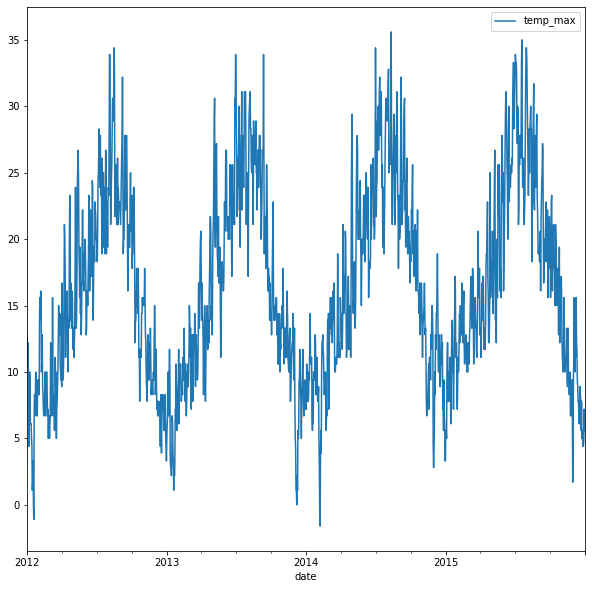

In [127]:
seattle_weather.plot('date', 'temp_max', figsize=(10,10));

__Overview:__
- Merging, Joining, and Concatenating using Pandas Dataframes are very useful, however, advanced for the beginner programmer
- However, the does not mean we can't explore the basics of what merging, joining, and concatenating is and how we can do it in Pandas 
- The full documentation for Merge, Join, and Concatenate can be found [here](http://pandas.pydata.org/pandas-docs/stable/merging.html)
- All 3 methods below, in their own way, describe the act of combining together Series and DataFrame objects with some logic to handle the indexes of the objects you are combining:
> 1. __Concatenating Objects:__ Concatenating objects in Pandas is done using the `concat` or the `append` function and you can think of this as "gluing together" multiple DataFrames or Series 
> 2. __Merging Objects:__ Merging objects in Pandas is done using the `merge` function and replicates [SQL Joins](https://en.wikipedia.org/wiki/Join_(SQL))
> 3. __Joining Objects:__ Joining objects in Pandas is done using the `join` function and can be used for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

__Helpful Points:__
1. We actually have already concatenated DataFrames above when we added a new row to an existing DataFrame 
2. Remember that indexes are very important to DataFrames and most of the "logic" that these methods employ revolve around what to do with DataFrames/Series that have different indexes
3. SQL and Databases is definitely not required knowledge for this course, but further reading on Data Models (for your interest only) can be found [here](https://en.wikipedia.org/wiki/One-to-one_(data_model)) for __One-to-One Relationships__ and [here](https://en.wikipedia.org/wiki/Many-to-many_(data_model)) for __Many-to-Many Relationships__

__Practice:__ Examples of Advanced Manipulation of Pandas - Merge/Join/Concatenate in Python

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
# initialize 3 data frames to concatenate with same column names and index labels 
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1']},
                     index=[0, 1])
 
df2 = pd.DataFrame({'A': ['A2', 'A3'],
                    'B': ['B2', 'B3']},
                     index=[2, 3])

df3 = pd.DataFrame({'B': ['B2', 'B7'],
                    'F': ['F2', 'F3']},
                     index=[1, 5])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

### Concatenating Two DataFrames with Different Indexes

#### Using Concat

In [ ]:
result = pd.concat([df1, df2]) # concatenate one dataframe on another along rows 
result

#### Using Append

In [ ]:
a_result = df1.append(df2)
a_result

### Concatenating Two DataFrames with Same Indexes

#### Using Concat

In [ ]:
# option 1 (finds unique columns, duplicates rows)
result = pd.concat([df1, df3], axis = 0) # concatenate one dataframe on another along rows
result

In [ ]:
# option 2 (finds unique rows, duplicates columns)
result_1 = pd.concat([df1, df3], axis = 1) # concatenate one dataframe on another along columns
result_1

In [ ]:
# option 3 (uses only index from df1)
result_2 = pd.concat([df1, df3], axis = 1, join_axes=[df1.index]) # concatenate one dataframe on another along columns
result_2

In [ ]:
# option 4 (ignores and resets index)
result_3 = pd.concat([df1, df3], ignore_index = True) # same as option 1 but with reset index 
result_3

#### Using Append

In [ ]:
a_result_1 = df1.append([df3]) # same as option 1 above
a_result_1

In [ ]:
a_result_2 = df1.append([df3], ignore_index = True) # same as option 4 above
a_result_2

## Merge

Let's create some new DataFrames to practice merging.

In [137]:
raw_data_1 = {
        'department_id': ['1', '2', '3'],
        'first_name': ['Gordon', 'Roberto', 'Jerod'], 
        'last_name': ['Dri', 'Reif', 'Rubalcava']}
df_a = pd.DataFrame(raw_data_1, columns = ['department_id', 'first_name', 'last_name'])

raw_data_2 = {
        'department_id': ['2', '3', '4', '10'],
        'first_name': ['Jason', 'Zach', 'Paul', 'Damien'], 
        'last_name': ['Moss', 'Miller', 'Trowbridge', 'Martin']}
df_b = pd.DataFrame(raw_data_2, columns = ['department_id', 'first_name', 'last_name'])

raw_data_3 = {
        'department_id': ['1', '2', '3', '4', '5'],
        'manager_id': ['12', '24', '13', '4', '123']}
df_c = pd.DataFrame(raw_data_3, columns = ['department_id', 'manager_id'])

In [138]:
df_a

,department_id,first_name,last_name
0,1,Gordon,Dri
1,2,Roberto,Reif
2,3,Jerod,Rubalcava


In [139]:
df_b

,department_id,first_name,last_name
0,2,Jason,Moss
1,3,Zach,Miller
2,4,Paul,Trowbridge
3,10,Damien,Martin


In [140]:
df_c

,department_id,manager_id
0,1,12
1,2,24
2,3,13
3,4,4
4,5,123


### Merging On Columns

In [141]:
all_employees = pd.concat([df_a, df_b]).reset_index()
all_employees

,index,department_id,first_name,last_name
0,0,1,Gordon,Dri
1,1,2,Roberto,Reif
2,2,3,Jerod,Rubalcava
3,0,2,Jason,Moss
4,1,3,Zach,Miller
5,2,4,Paul,Trowbridge
6,3,10,Damien,Martin


In [142]:
pd.merge(all_employees, df_c, on = "department_id") # concatenate 2 employee df and then merge with department info df

,index,department_id,first_name,last_name,manager_id
0,0,1,Gordon,Dri,12
1,1,2,Roberto,Reif,24
2,0,2,Jason,Moss,24
3,2,3,Jerod,Rubalcava,13
4,1,3,Zach,Miller,13
5,2,4,Paul,Trowbridge,4


In [146]:
pd.merge(all_employees, df_c, left_on = "department_id", right_on = "department_id", how='outer') # same as above 

,index,department_id,first_name,last_name,manager_id
0,0.0,1,Gordon,Dri,12
1,1.0,2,Roberto,Reif,24
2,0.0,2,Jason,Moss,24
3,2.0,3,Jerod,Rubalcava,13
4,1.0,3,Zach,Miller,13
5,2.0,4,Paul,Trowbridge,4
6,3.0,10,Damien,Martin,NaN
7,NaN,5,NaN,NaN,123


### Merging on Indexes

In [ ]:
pd.merge(df_a, df_b, right_index = True, left_index = True) # merge based on indexes 


### Outer Join

__[Outer Join](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/):__ “Full outer join produces the set of all records in Table A and Table B, with matching records from both sides where available. If there is no match, the missing side will contain null.”

- Don't worry about the terminology and definition, this is just for your reference. Just keep this method in your "toolkit" in the event that one of your use cases demands that your result is as appears below

In [ ]:
pd.merge(df_a, df_b, on='department_id', how='outer')

### Inner Join

__[Inner Join](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/):__ “Inner join produces only the set of records that match in both Table A and Table B.”

- Don't worry about the terminology and definition, this is just for your reference. Just keep this method in your "toolkit" in the event that one of your use cases demands that your result is as appears below

In [ ]:
pd.merge(df_a, df_b, on='department_id', how='inner')

### Left Join

__[Left Join](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/):__ "Left outer join produces a complete set of records from Table A, with the matching records (where available) in Table B. If there is no match, the right side will contain null.”

- Don't worry about the terminology and definition, this is just for your reference. Just keep this method in your "toolkit" in the event that one of your use cases demands that your result is as appears below

In [ ]:
pd.merge(df_a, df_b, on='department_id', how='left')

### Right Join

__[Right Join](https://en.wikipedia.org/wiki/Relational_algebra#Right_outer_join_(%E2%9F%96)):__ "Right outer join produces a complete set of records from Table B, with the matching records (where available) in Table A. If there is no match, the right side will contain null.”

- Don't worry about the terminology and definition, this is just for your reference. Just keep this method in your "toolkit" in the event that one of your use cases demands that your result is as appears below

In [ ]:
pd.merge(df_a, df_b, on='department_id', how='right')

## Join

In [ ]:
raw_data_1 = {
        'first_name': ['Gordon', 'Roberto', 'Jerod'],
        'last_name': ['Dri', 'Reif', 'Rubalcava']}
df_a = pd.DataFrame(raw_data_1, index = ['employee_1', 'employee_2', 'employee_3'])

raw_data_1 = {
        'department_id': ['1', '2', '2'],
        'team_id': ['3', '3', '3']}
df_b = pd.DataFrame(raw_data_1, index = ['employee_1', 'employee_3', 'employee_4'])

In [ ]:
df_a

In [ ]:
df_b

### Left Join

In [ ]:
df_a.join(df_b)

In [ ]:
df_a.join(df_b, how = "left") # same as above (default)

### Right Join

In [ ]:
df_a.join(df_b, how = "right") # right join (see above for definition)

### Outer Join

In [ ]:
df_a.join(df_b, how = "outer") # outer join (see above for definition)

### Inner Join

In [ ]:
df_a.join(df_b, how = "inner") # inner join (see above for definition)

### Suffixes for Overlapping Columns

In [ ]:
df_a.join(df_b, lsuffix = "_l", rsuffix = "_r") # overlapping columns

### Joining Index to Column

In [ ]:
raw_data_1 = {
        'first_name': ['Gordon', 'Roberto', 'Jerod'],
        'last_name': ['Dri', 'Reif', 'Rubalcava'],
        'employee_num': ["employee_1", "employee_2", "employee_3"]}
df_a = pd.DataFrame(raw_data_1)

raw_data_1 = {
        'department_id': ['1', '2', '2'],
        'team_id': ['3', '3', '3']}
df_b = pd.DataFrame(raw_data_1, index = ["employee_1", "employee_2", "employee_3"])

In [ ]:
df_a

In [ ]:
df_b

In [ ]:
df_a.join(df_b, on = "employee_num") # join on index and column 

# Reshaping by Pivot, Melt, and Pivot Table:

__Overview:__
- It is common as a Data Scientist to work with data that is stored in CSV files or databases in "stacked" format (i.e. information for multiple groups stacked on top of each other)
- However, it is inconvenient to perform analysis on stacked data, and much easier to work with data that is grouped by category or some other variable
- In Excel, the __["Pivot Table"](https://support.office.com/en-us/article/create-a-pivottable-to-analyze-worksheet-data-a9a84538-bfe9-40a9-a8e9-f99134456576)__ offers a helpful way to "unstack" stacked data in a format that is conducive for analysis
- Pandas has very similar methods for "pivoting/reshaping" data that can be found [here](http://pandas.pydata.org/pandas-docs/stable/reshaping.html):
> 1. Reshaping by __Pivoting DataFrame Objects:__ This reshaping can be done using the `pivot` function. The primary purpose here is to make the `columns` the unique variables and the `index` the time frame or identifier
> 2. Reshaping by __Melting DataFrame Objects:__ This reshaping can be done using the `melt` function. The primary purpose here is to make one or more columns identifier variables and the other columns measured variables which are "unpivoted" to the row axis
> 3. Reshaping by __Pivot Tables:__ This reshaping can be done using the `pivot_table` function. The primary purpose here is to pivot data AND provide aggregation of numeric data 

__Helpful Points:__
1. Most people coming into Data Science have some experince with Excel, so these operations may feel "at home" for them
2. Note the difference between the `pivot` and `pivot_table` functions. The former is used for general purpose pivoting of DataFrames and the latter is used for pivoting with aggregation of numeric data 

__Practice:__ Examples of Advanced Manipulation of Pandas - Reshaping and Pivot Tables in Python 

## Pivot

In [ ]:
values = [{"Day":"Monday", "Buyer":"Mom", "Type":"Fuel", "Amount":45},
         {"Day":"Tuesday", "Buyer":"Dad", "Type":"Food", "Amount":200},
         {"Day":"Tuesday", "Buyer":"Gordon", "Type":"Sports", "Amount":100},
         {"Day":"Monday", "Buyer":"Victor", "Type":"Music", "Amount":90}]
expenses_df = pd.DataFrame(values, columns = ["Day", "Buyer", "Type", "Amount"])
expenses_df

### Pivot by Day and Buyer

In [ ]:
expenses_df.pivot(index = "Day", columns = "Buyer", values = "Amount")

### Pivot by Buyer and Type

In [ ]:
expenses_df.pivot(index = "Type", columns = "Buyer", values = "Amount")

## Melt

### Melt by Type

In [ ]:
# subset for only type 
expenses_df.melt(id_vars = ["Day", "Buyer"], value_vars = ["Type"])

### Melt by Type and Amount

In [ ]:
# subset for type and amount
expenses_df.melt(id_vars = ["Day", "Buyer"], value_vars = ["Type", "Amount"])

## Pivot Table

In [ ]:
expenses_df

### Aggregate Amount by Buyer

In [ ]:
pd.pivot_table(expenses_df, values = "Amount", index = "Buyer", aggfunc = np.sum)

### Aggregate Amount by Day

In [ ]:
pd.pivot_table(expenses_df, values = "Amount", index = "Day", aggfunc = np.sum)

# GroupBy

__Overview:__
- The GroupBy functionality draws from the common "Split-Apply-Combine" strategy which is summarized below:
> 1. __Split:__  The split step involves splitting the data into groups based on some criteria
> 2. __Apply:__ The apply step involves applying a function to each group independently. The functions applied in this step fall in 3 main categories:
>> a. __Aggregation:__ The aggregation functions compute a summary statistic about each group (i.e. group sums, means, sizes, counts, etc.)<br>
>> b. __Transformation:__ The transformation functions perform some group-specific computations on each group (i.e. standardize data within each group, fill NAs within groups, etc.)<br>
>> c. __Filtration:__ The filtration functions discard some groups according to a group-wise computation (i.e. discard data that belongs to groups with only a few members, filter out data based on group sum or mean, etc.)<br>
> 3. __Combine:__ The combine step involves combining the results into a data structure 

__Helpful Points:__
1. The GroupBy functionality exists in the SQL command `GROUP BY` which you can read about it [here](https://dev.mysql.com/doc/refman/5.7/en/group-by-modifiers.html) and [here](https://docs.microsoft.com/en-us/sql/t-sql/queries/select-group-by-transact-sql) if you are interested 
2. Arguably the most common functionality for Data Scientists is "GroupBy-Aggregation"

__Overview:__
- The __[GroupBy](http://pandas.pydata.org/pandas-docs/stable/groupby.html)__ function in Pandas allows us to perform the "split-apply-combine" strategy in a very efficient manner
- The procedure is performed in the following steps where the "combine" step is implicit in the "apply" step:

> /1. __STEP 1 (SPLIT):__ Splitting is completed by creating a "GroupBy" object which basically just means separating out the data into constituent groups. GroupBy objects can be created in the following way: 
>> a. `grouped = obj.groupby(key)`<br>
>> b. `grouped = obj.groupby(key, axis=1)`<br>
>> c. `grouped = obj.groupby([key1, key2])`
>> - Here, the `obj` is usually a Pandas `DataFrame` object and the `key` is most commonly one of the following:<br>
>> > a. List or NumPy array<br> 
>> > b. Dictionary or Series<br>
>> > c. Column name<br>
>> - In practice, the "group keys" will refer to the labels of each group (i.e. "A" and "B" are the group keys for Group "A" and Group "B" and "Group" would be passed as the `key` argument into the `groupby` function) 

> /2. __STEP 2 (APPLY):__ Now that a GroupBy object has been created, we can perform various "apply" methods to the object such as:
>> a. __Aggregation:__ Aggregation returns a new DataFrame and can be completed in this fashion: `grouped.agg` or `grouped.aggregate`<br>
>> b. __Transformation:__ Transformation returns an object that is indexed the same as the one begin grouped and can be completed in this fashion: `grouped.transform`<br>
>> c. __Filtration:__ Filtration returns a subset of the original object and can be completed in this fashion: `grouped.filter`<br>
>> d. __Other:__ `grouped.count`, `grouped.cummax`, `grouped.cumsum`, `grouped.fillna`, `grouped.max`, etc. 

__Helpful Points:__
1. GroupBy objects have a few useful attributes for analyzing the groups that were created:
> 1. The `groups` attribute to view the groups that were created: `df.groupby(key).groups`
> 2. The `describe` attribute to view information about the groups that were created: `df.groupby(key).describe()`
> 3. The `ngroups` attribute to view the number of groups that were created: `df.groupby(key).ngroups`
> 4. The `first` attribute to view the first few rows of the groups that were created: `df.groupby(key).first()`
> 5. The `last` attribute to view the last few rows of the groups that were created: `df.groupby(key).last()`
> 6. The `get_group` attribute to access one of the many groups that were created:`df.groupby(key).get_group()`
2. Remember you can always see a complete list of all the attributes of an object by selecting `obj.<TAB>`

__Practice:__ Examples of GroupBy in Pandas in Python

## Split

The `.groupby` method splits a DataFrame into groups of observations with equal values in some column.

In [ ]:
department_df = pd.DataFrame({'Department' : ['Marketing', 'HR', 'Marketing', 'HR',
                           'Marketing', 'HR', 'Marketing', 'Marketing'],
                   'City' : ['Chicago', 'Chicago', 'Seattle', 'New York',
                           'Seattle', 'Seattle', 'Chicago', 'New York'],
                   'People' : [100, 20, 31, 300,
                           1000, 300, 450, 5],
                   'Revenue' :[200, 200, 31, 350,
                           1200, 300, 4050, 50]}, columns = ["Department", "City", "People", "Revenue"])

In [ ]:
department_df

### Creating a `groupby` Object

In [ ]:
grouped_dpt = department_df.groupby('Department')
grouped_dpt # groupby object 

### Attributes of `groupby` Object

In [ ]:
grouped_dpt.groups # groups 

In [ ]:
grouped_dpt.describe() # summary statistics 

In [ ]:
grouped_dpt.ngroups # number of groups 

In [ ]:
grouped_dpt.first() # first row of each group 

In [ ]:
grouped_dpt.head(1)

In [ ]:
grouped_dpt.last() # last row of each group 

In [ ]:
grouped_dpt.tail(2)

In [ ]:
grouped_dpt.nth(2) # nth row

### Get Group

In [ ]:
grouped_city = department_df.groupby('City')
grouped_city # groupby object 

In [ ]:
grouped_dpt["City"]

In [ ]:
grouped_dpt.get_group("HR") # get one group 

## Apply

In [ ]:
department_df

### Apply Aggregations

#### Aggregate by Sum

In [ ]:
grouped_dpt.aggregate(np.sum) # aggregate sum based on one group

In [ ]:
grouped_dpt.agg(np.sum) # note: we can also just write agg instead of aggregate

In [ ]:
department_df.groupby("Department", as_index = False).sum() # if we want the group keys as a column and not index 

In [ ]:
# new groupby object by department AND city
grouped_dpt_city = department_df.groupby(["Department", "City"])

In [ ]:
grouped_dpt_city.aggregate(np.sum) # aggregate sum based on two groups

The above is actually an example of "multiple keys" since we have both "Department" and "City" as Keys and therefore the result is a __[MultiIndex](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) or Hierarchical Index__ which is not covered in this course. We can avoid this by making the group keys both into columns like we did above:

In [ ]:
department_df.groupby(["Department", "City"], as_index = False).sum()

#### Aggregate by Mean

In [ ]:
grouped_dpt.aggregate(np.mean) # means based on one group

In [ ]:
grouped_dpt_city.aggregate(np.mean) # means based on two groups

#### Aggregate by Sizes

In [ ]:
grouped_dpt.size()

In [ ]:
grouped_dpt_city.size()

#### Aggregate by Multiple Functions

In [ ]:
grouped_dpt.aggregate([np.sum, np.mean, np.std]) # this is similar to describe() above 

### Apply Transformations

In [ ]:
department_df

#### Transform to Sum of Groups

In [ ]:
department_df["Revenue_Total"] = grouped_dpt["Revenue"].transform('sum') # transform revenue to be total departmental revenue
department_df

#### Transform to Z-Score of Groups

We can also use a manual function inside the transform argument. In this case, we are using a function that calculates the __["Z-Score"](https://en.wikipedia.org/wiki/Standard_score)__ which is a standardized measure that is calculated by subtracting the mean from every value and dividing this by the standard deviation. We will see this in more detail in Lectures 11 and 12.  

- Don't worry about the definition of Z-Score here. The point of this example is not to teach the Z-Score, but to see how we can apply a manual function to each group and transform the values
- The most important thing to note here is that the function is being applied WITHIN groups only. See calculation for "Standardized_Revenue" for the Marketing Department in Chicago:

Group Mean across all Marketing Departments: $1106.2$<br>
Group Standard Deviation across all Marketing Departments: $1715.2$<br>
Z-Score for Marketing-Chicago: $(200 - 1106.2)/1715.2 = -0.528$

In [ ]:
zscore = lambda x: (x-x.mean()) / x.std()
zscore

In [ ]:
department_df["Standardized_Revenue"] = grouped_dpt["Revenue"].transform(zscore) # transform revenue to be total departmental revenue
department_df

#### Transform to Range

In [ ]:
department_df["Revenue_Range"] = grouped_dpt["Revenue"].transform('max') - grouped_dpt["Revenue"].transform('min') 
department_df

Note: NOT shown here is an application of replacing missing data with group mean values. Since the transform method is applied WITHIN groups, we can impute missing data with the group mean value that observation belongs to.

### Apply Filters

Recall in Lecture 4 our discussion of the `map`, `reduce`, and `filter` functions that were used in conjunction with `lambda` functions. Here is no different except we are applying the function WITHIN groups

#### Subset 1

In [ ]:
# take only elements that belong to groups with a group sum greater than 100
grouped_dpt["Revenue"].filter(lambda x: x.sum() > 1000)

This returns all the elements from the Marketing group since this was the only group that had a sum greater than 1000

#### Subset  2

In [ ]:
# take only elements that belong to groups that have less than 5 members
grouped_dpt["Revenue"].filter(lambda x: len(x) < 5)

This returns all the elements from the HR group since this was the only group that had less than 5 members 

# Operations on Pandas Data Structures

__Overview:__
- Pandas offers various ways to operate on Series and DataFrames in both a row/column fashion (i.e. vectorized) and an element-wise fashion
- Operations can be broken down into the following two types:
> 1. __Operations with Loops:__ There are 2 main types of loop in Pandas Data Structures:
>> a. __Looping over Rows:__ To loop over rows, it is possible to use the functions __[`df.itertuples`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.itertuples.html)__ (which iterates over DataFrame rows as namedtuples of the values) or __[`df.iterrows`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)__ (which iterates over (column, Series) pairs <br>
>> b. __Looping over Columns:__ To loop over columns, it is possible to use the functions __[`df.iteritems`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iteritems.html)__
> 2. __Operations without Loops:__ There are 3 main types of functions that are used to perform operations without loops:
>> a. __[`apply`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html):__ The `apply` function works on a row/column basis on `DataFrame` objects. The syntax is as follows: `df.apply(func, axis=0)`, where the `axis=0` is to apply function over each column and `axis=1` is to apply function over each row<br> 
>> b. __[`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):__ The `map` function works on an elment-wise basis on `Series` objects. The syntax is as follows: `s.map(arg)` where `arg` can be a function, dictionary or series<br>
>> c. __[`applymap`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html):__ The `applymap` function works on an element-wise basis on `DataFrame` objects. The syntax is as follows: `df.applymap(func)`

__Helpful Points:__
1. Some users have expressed discontent and overall discouragement over using `df.iterrows` to iterate over rows of a DataFrame in favour of vectorized solutions (see Operations without Loops above) OR `df.itertuples`. You can read about some of `df.iterrows` performance concerns [here](https://stackoverflow.com/questions/24870953/does-iterrows-have-performance-issues) if you are interested 
2. In each case of the operations without loops, the function that may be entered in as an argument can be a manually made one using the `lambda` expression or a function that is supported by NumPy in the form of `np.func`

__Practice:__ Examples of Operations on Elements, Rows, and Columns on Pandas Data Structures in Python 

## Loops

In [ ]:
my_df_small = pd.DataFrame(np.arange(10))
my_df_large = pd.DataFrame(np.arange(100000))

In [ ]:
my_df_small.head()

### Looping over Rows - Iterrows

In [ ]:
for row in my_df_small.iterrows():
    print(row)

The function `iterrows()` iterates over DataFrame rows as (index, Series) pairs. For example:

1. The first (index, Series) pairs is `(0, 0   0)` which refers to the `0` index (first row) and the Series object which is the column name (`0`) and the value `0`
2. The seconds (index, Series) pairs is `(1, 0   0)` which refers to the `1` index (second row) and the Series object which is the column name (`0`) and the value `1`

In [ ]:
%%timeit 

for row in my_df_large.iterrows():
    pass

### Looping over Rows - Itertuples

In [ ]:
for row in my_df_small.itertuples():
    print(row)

The function `itertuples()` iterates over DataFrame rows as namedtuples. For example:

1. The first namedtuple is `(Index=0, _1=0)` which refers to the tuple that contains the `Index=0` and `_1` which refers to the name of the column and the value in that column (`0`)
2. The second namedtuple is `(Index=1, _1=1)` which refers to the tuple that contains the `Index=1` and `_1` which refers to the name of the column and the value in that column (`1`)

In [ ]:
%%timeit

for row in my_df_large.itertuples():
    pass

Compare this time result using `itertuples()` with the time result above using `iterrows()`. The mean time of `itertuples()` was 44.8 ms per loop compared to `iterrows()` which was over 3 seconds!!

### Looping over Columns - Iteritems

In [ ]:
my_df_small_T = my_df_small.T
my_df_large_T = my_df_large.T

In [ ]:
my_df_small_T

In [ ]:
for col in my_df_small_T.iteritems():
    print(col)

Same format as `df.iterrows()` above

## Operations without Loops

In [ ]:
department_df_sub = department_df.loc[:, ["People", "Revenue"]]
revenue = department_df["Revenue"]

In [ ]:
department_df_sub

In [ ]:
revenue

### Apply

#### Sum

In [ ]:
department_df_sub.apply(np.sum, axis = 0) # apply function to each column 

In [ ]:
department_df_sub.sum(axis = 0) # non-apply equivalent 

In [ ]:
department_df_sub.apply(np.sum, axis = 1)# apply function to each row 

In [ ]:
department_df_sub.sum(axis = 1)

#### Range

In [ ]:
department_df_sub.apply(lambda x: x.max() - x.min()) # apply function to each column 

### Map

In [ ]:
revenue.map(lambda x: '%.2f' % x) # insert 2 decimal places for each element in the Series 

### Applymap

In [ ]:
department_df_sub.applymap(lambda x: '%.2f' % x) # insert 2 decimal places for each element in the Series 

# Handling Missing Data in Pandas Data Structures:

__Overview:__
- In Data Science, when working with real-world data, it is very common to encounter missing data that may be a result of data not available, data not recorded, or data not present for some reason
- Since the purpose of this course is not teach tools for analyzing data, per se, we won't cover handling missing data in too much detail
- However, as a beginner you should be aware of the possibile options that Pandas provides for storing missing data, finding missing data, inserting missing data, and cleaning/filling missing data which can be read about in detail [here](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) and explained below:

> 1. __Storing Missing Data:__ The value `NaN` is the default missing value marker, but sometimes `None` is used as well 
> 2. __Finding Missing Data:__ Pandas offers many convenient functions for testing if values are missing such as: `df.isna()`, `df.notna()`, `df.isnull()`, `df.notnull()` which all return a boolean same-sized object indicating if the values are missing. It is also possible to use these functions to count the number of missing values (i.e. `np.count_nonzero(df.isnull())`, `np.count_nonzero(np.any(df.isnull(), axis=)`)
> 3. __Inserting Missing Data:__ It is possible to insert a missing value by setting values in Series or DataFrame objects as `None` or `np.nan`
> 4. __Cleaning/Filling Missing Data:__ Pandas offers many convenient functions for filling missing values such as: `df.fillna(value)` and `df.dropna(axis)`

__Helpful Points:__
1. Note two `NaN` values do not compare equal (i.e. `np.nan == np.nan` is evaluated as `False`)

__Practice:__ Examples of Operations to Handle Missing Data in Pandas Data Structures in Python

In [ ]:
na_df = df = pd.DataFrame(np.arange(15).reshape(5, 3), index=['a', 'c', 'e', 'f', 'h'],
                          columns=['one', 'two', 'three'])
na_df = na_df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
na_df

## Finding Missing Data

### `isna`, `notna`

Newer versions of pandas!

In [ ]:
na_df.isna() # check elements that are missing 

In [ ]:
na_df.notna() # check elements that are not missing

### `isnull`, `notnull`

In [ ]:
na_df.isnull() # check elements that are missing 

In [ ]:
na_df.notnull() # check elements that are not missing

### Counting Missing Items

In [ ]:
np.count_nonzero(na_df.isnull()) # total number of missing values

In [ ]:
np.count_nonzero(np.any(na_df.isnull(), axis=0)) # total number of columns with missing values 

In [ ]:
np.count_nonzero(np.any(na_df.isnull(), axis=1)) # total number of rows with missing values 

## Inserting Missing Data

In [ ]:
na_df["four"] = "Gordon"
na_df

### Inserting Missing Data into Int

In [ ]:
na_df.loc["a", "two"] = None # fills as NaN since replacing an int
na_df.loc["a", "three"] = np.nan # fills as NaN 
na_df

### Inserting Missing Data into Str

In [ ]:
na_df.loc["a", "four"] = np.nan # fills as None since replacing a str
na_df.loc["b", "four"] = None # fills as None
na_df

## Cleaning/Filling Missing Data

### Filling NA with Value

In [ ]:
na_df.fillna("NEW")

### Dropping Axis Labels with Missing Values

In [ ]:
na_df

In [ ]:
na_df.dropna(axis=0) # remove rows that have NA values 

# Time Series Data in Pandas

__Overview:__
- As a Data Scientist, it is common to encounter data that takes place over time (i.e. sales data, financial data, etc.) which are commonly known as __[Time Series](https://en.wikipedia.org/wiki/Time_series)__ Data 
- Recall in out early discussions about the usefulness of Pandas and one of the major points we outlined which was Pandas' Time Series extensive capabilities which can be read about in detail [here](https://pandas.pydata.org/pandas-docs/stable/timeseries.html)
- We will only briefly explore Pandas Time Series/Dates functionality here as they pertain to:
> 1. Initiating objects of the following Date-Time types:
>> a. `Timestamp` (single timestamp): created by `pd.to_datetime()`, `pd.Timestamp`<br>
>> b. `DatetimeIndex` (index of `Timestamp`): created by `pd.datetime()`, `pd.date_range()`, `pd.DatetimeIndex`<br>
>> c. `Period` (single time span): created by `pd.Period`<br>
>> d. `PeriodIndex` (index of `Period`): created by `pd.period_range`, `pd.PeriodIndex`
> 2. Common operations:
>> a. `df.shift()`: Shifts index by desired number of periods<br> 
>> b. `df.resample()`: Resampling operations during frequency conversion (i.e. converting secondly data into 5-minutely data). It operates as time-based GroupBy (see above)<br>
>> c. `df.rolling()`: Provides rolling window calculations 

__Helpful Points:__
1. Pandas Time Series capabilities leverage the NumPy `datetime64` and `timedelta54` dtypes and you will find these as the type of the object after initializing a Timestamp, Period, etc. 

## Part 1 (Initiating Objects):

In [ ]:
from datetime import datetime

### Example 1.1 (Initiating Timestamp):

### Example 1.1.1 (Using `pd.Timestamp()`):

In [ ]:
pd.Timestamp("2018-04-23")

In [ ]:
pd.Timestamp(2018, 4, 23)

### Example 1.1.2 (Using `pd.to_datetime()`):

In [ ]:
pd.to_datetime("2018/04/23")

### Example 1.2 (Initiating DatetimeIndex):

### Example 1.2.1 (Using `pd.date_range()`):

In [ ]:
first_week = pd.date_range("2018/04/23", periods = 7, freq = "D") # first week of class 
first_week

In [ ]:
first_week_day_num = pd.Series(np.arange(1,8), index = first_week)
first_week_day_num

In [ ]:
converted_first_week = first_week_day_num.asfreq("B") # class only happens on business days 
converted_first_week

See [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) for the possible time series frequencies that can be used and their Pandas Aliases. 

### Example 1.3 (Initiating Period):

### Example 1.3.1 (Using `pd.Period()`):

In [ ]:
pd.Period("2018-04") # inferred as Month

In [ ]:
pd.Period("2018-04-23") # inferred as Day

### Example 1.4 (Initiating PeriodIndex):

### Example 1.4.1 (Using `pd.period_range()`):

In [ ]:
pd.period_range(start="2018-04-23", end = "May-31-2018", freq = "M")

## Part 2 (Common Operations):

### Example 2.1 (Using Shift):

In [ ]:
converted_first_week

In [ ]:
converted_first_week.shift(2) # shift values by 2 periods 

### Example 2.2 (Using Resample):

In [ ]:
rng = pd.date_range('4/23/2018', periods=100, freq='S') # range of 100 seconds
ts = pd.Series(np.arange(len(rng)), index = rng) # fill in values of 0 - 100
ts.head()

In [ ]:
ts.resample("Min").sum() # 1 minute totals 

### Example 2.3 (Using Rolling):

In [ ]:
df = pd.DataFrame({'Counts': [10, 31, 42, 5, 1, np.nan]})
df

In [ ]:
df.rolling(2).sum() # rolling sum with window length of 2 (sum of every 2 values) - ignored NaN

In [ ]:
df.rolling(window = 2, min_periods = 1).sum() # rolling sum with window length of 2 (sum of every 2 values) - adds if there is at least 1 value in the window